In [ ]:
import pandas as pd

# Specify the file path within your Google Drive
file_path = '/content/Dengu_survey_Dataset.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

In [ ]:
!pip install shap

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import ADASYN
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [ ]:
# Assuming your DataFrame is named 'df'
column_names = df.columns
print(column_names)

Index(['Patient_ID', 'Age', 'Sex', 'Date_of_Onset_of_Fever', 'Patients_Area',
       'Total_Days_with_symthoms', 'Current_Body_Temperature',
       'Severe_Headache', 'Pain_Behind_the_Eyes', 'Joint_and_Muscle_Aches',
       'Metallic_Taste_in_the_Mouth', 'Appetite_Loss', 'Abdominal_Pain',
       'Nausea_Vomiting', 'Diarrhoea', 'Hemoglobin (g/dL)', 'WBC(cmm)',
       'Hematocrit(HCT) %', 'MCV(fl)', 'MCH(pg)', 'MCHC(g/dL)',
       'RBC(million/cmm)', 'Neutrophil (%)', 'Lymphocyte (%)', 'Monocyte (%)',
       'Eosinophil (%)', 'Platelet (cmm)', 'NS1', 'Unnamed: 28',
       'Unnamed: 29'],
      dtype='object')


In [ ]:
df.head()

,Patient_ID,Age,Sex,Date_of_Onset_of_Fever,Patients_Area,Total_Days_with_symthoms,Current_Body_Temperature,Severe_Headache,Pain_Behind_the_Eyes,Joint_and_Muscle_Aches,...,MCHC(g/dL),RBC(million/cmm),Neutrophil (%),Lymphocyte (%),Monocyte (%),Eosinophil (%),Platelet (cmm),NS1,Unnamed: 28,Unnamed: 29
0,P-01,22.0,M,18-08-2023,Khagan,5,102.0,yes,yes,yes,...,33.0,4.77,58.0,32.0,9.0,1.0,"1,50,000",Positive,NaN,NaN
1,P-02,22.0,M,15-08-2023,Changao,4,101.0,yes,no,no,...,36.0,5.03,66.3,28.5,4.9,0.0,"2,66,000",Negative,NaN,NaN
2,P-03,40.0,M,15-09-2023,Lalbagh,3,102.0,yes,yes,yes,...,34.0,4.49,75.0,18.0,4.0,3.0,"2,33,000",Negative,NaN,NaN
3,P-04,24.0,M,2023-09-07 00:00:00,Uttora,3,101.0,yes,no,yes,...,34.7,4.70,57.0,41.0,1.0,1.0,"2,02,000",Negative,NaN,NaN
4,P-05,22.0,M,20-07-2023,Gazipur,4,102.0,yes,yes,yes,...,30.8,6.27,44.0,40.0,11.0,5.0,"1,32,000",Positive,NaN,NaN


In [ ]:
df.tail()


,Patient_ID,Age,Sex,Date_of_Onset_of_Fever,Patients_Area,Total_Days_with_symthoms,Current_Body_Temperature,Severe_Headache,Pain_Behind_the_Eyes,Joint_and_Muscle_Aches,...,MCHC(g/dL),RBC(million/cmm),Neutrophil (%),Lymphocyte (%),Monocyte (%),Eosinophil (%),Platelet (cmm),NS1,Unnamed: 28,Unnamed: 29
995,P-996,0.5,M,25-07-2023,Shamoly,3,103.0,yes,yes,yes,...,32.94,4.50,59.28,35.7,2.0,1.0,"2,02,000",Negative,NaN,NaN
996,P-997,0.5,M,25-07-2023,Shamoly,3,103.0,yes,yes,yes,...,33.90,4.54,40.00,45.0,8.0,7.0,"2,13,000",Negative,NaN,NaN
997,P-998,21.0,M,20-09-2023,Mirpur,2,102.0,yes,no,yes,...,16.20,5.19,85.00,11.0,3.0,1.0,"1,18,000",Negative,NaN,NaN
998,P-999,39.0,F,20-09-2023,Tejgaon,4,102.0,yes,yes,yes,...,35.70,5.60,70.00,20.0,9.0,1.0,"1,86,000",Negative,NaN,NaN
999,P-1000,15.0,F,22-09-2023,Jigatola,4,101.0,yes,yes,yes,...,35.70,5.60,70.00,20.0,9.0,1.0,"1,75,000",Negative,NaN,NaN


In [ ]:
df.corr()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,Age,Total_Days_with_symthoms,Current_Body_Temperature,Hemoglobin (g/dL),WBC(cmm),Hematocrit(HCT) %,MCV(fl),MCH(pg),MCHC(g/dL),RBC(million/cmm),Neutrophil (%),Lymphocyte (%),Monocyte (%),Eosinophil (%),Unnamed: 28,Unnamed: 29
Age,1.000000,0.059467,0.013612,-0.050970,0.001615,-0.164103,0.044854,0.036241,0.049771,-0.055391,0.091596,-0.095913,-0.030447,-0.002898,NaN,NaN
Total_Days_with_symthoms,0.059467,1.000000,-0.060279,-0.025805,0.099167,-0.033221,-0.091603,-0.102691,-0.074633,0.024493,-0.080503,0.063541,0.036567,0.126693,NaN,NaN
Current_Body_Temperature,0.013612,-0.060279,1.000000,0.002528,-0.018335,0.005441,0.009783,-0.006500,-0.004581,-0.008059,0.094179,-0.083521,-0.043546,-0.066493,NaN,NaN
Hemoglobin (g/dL),-0.050970,-0.025805,0.002528,1.000000,-0.058009,0.289692,0.085211,0.099695,0.077531,0.079091,-0.006864,0.020341,-0.004163,-0.044240,NaN,NaN
WBC(cmm),0.001615,0.099167,-0.018335,-0.058009,1.000000,-0.084993,0.130172,0.054207,0.003484,-0.072397,0.046206,-0.033246,-0.038461,0.042383,NaN,NaN
Hematocrit(HCT) %,-0.164103,-0.033221,0.005441,0.289692,-0.084993,1.000000,0.243865,0.176076,0.039121,0.271348,-0.113172,0.133489,0.112255,0.029706,NaN,NaN
MCV(fl),0.044854,-0.091603,0.009783,0.085211,0.130172,0.243865,1.000000,0.495547,0.120347,-0.119772,0.106967,-0.033394,-0.123085,-0.056687,NaN,NaN
MCH(pg),0.036241,-0.102691,-0.006500,0.099695,0.054207,0.176076,0.495547,1.000000,0.208331,-0.090099,0.072918,-0.031995,-0.074576,0.047373,NaN,NaN
MCHC(g/dL),0.049771,-0.074633,-0.004581,0.077531,0.003484,0.039121,0.120347,0.208331,1.000000,-0.032518,-0.066434,0.123724,-0.007950,-0.065804,NaN,NaN
RBC(million/cmm),-0.055391,0.024493,-0.008059,0.079091,-0.072397,0.271348,-0.119772,-0.090099,-0.032518,1.000000,-0.044653,0.013830,0.087026,0.044978,NaN,NaN


In [ ]:
df.isnull().sum()

Patient_ID                        0
Age                               0
Sex                               0
Date_of_Onset_of_Fever            0
Patients_Area                     0
Total_Days_with_symthoms          0
Current_Body_Temperature          0
Severe_Headache                   0
Pain_Behind_the_Eyes              0
Joint_and_Muscle_Aches            0
Metallic_Taste_in_the_Mouth       0
Appetite_Loss                     0
Abdominal_Pain                    0
Nausea_Vomiting                   0
Diarrhoea                         0
Hemoglobin (g/dL)                 0
WBC(cmm)                          0
Hematocrit(HCT) %                 0
MCV(fl)                           0
MCH(pg)                           0
MCHC(g/dL)                        0
RBC(million/cmm)                  0
Neutrophil (%)                    0
Lymphocyte (%)                    0
Monocyte (%)                      0
Eosinophil (%)                    0
Platelet (cmm)                    0
NS1                         

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient_ID                   1000 non-null   object 
 1   Age                          1000 non-null   float64
 2   Sex                          1000 non-null   object 
 3   Date_of_Onset_of_Fever       1000 non-null   object 
 4   Patients_Area                1000 non-null   object 
 5   Total_Days_with_symthoms     1000 non-null   int64  
 6   Current_Body_Temperature     1000 non-null   float64
 7   Severe_Headache              1000 non-null   object 
 8   Pain_Behind_the_Eyes         1000 non-null   object 
 9   Joint_and_Muscle_Aches       1000 non-null   object 
 10  Metallic_Taste_in_the_Mouth  1000 non-null   object 
 11  Appetite_Loss                1000 non-null   object 
 12  Abdominal_Pain               1000 non-null   object 
 13  Nausea_Vomiting    

In [ ]:
# Drop irrelevant columns, including "age"
df1=df.drop(['Patient_ID','Patients_Area','Date_of_Onset_of_Fever','Unnamed: 28','Unnamed: 29'], axis=1)

In [ ]:
df1.Sex.unique()

array(['M', 'F'], dtype=object)

In [ ]:
df1.Joint_and_Muscle_Aches .unique()

array(['yes', 'no'], dtype=object)

In [ ]:
# Replace
df1['Sex'] = df1['Sex'].replace({'M': 0, 'F': 1})

In [ ]:
# Replace
df1['Severe_Headache'] = df1['Severe_Headache'].replace({'yes': 0, 'no': 1,'  no':1})

In [ ]:
# Replace
df1['Pain_Behind_the_Eyes'] = df1['Pain_Behind_the_Eyes'].replace({'yes': 0, 'no': 1,'  no':1})

In [ ]:
# Replace
df1['Joint_and_Muscle_Aches'] = df1['Joint_and_Muscle_Aches'].replace({'yes': 0, 'no': 1,'  no':1})

In [ ]:
# Replace
df1['Metallic_Taste_in_the_Mouth'] = df1['Metallic_Taste_in_the_Mouth'].replace({'yes': 0, 'no': 1,'  no':1})

In [ ]:
# Replace
df1['Appetite_Loss'] = df1['Appetite_Loss'].replace({'yes': 0, 'no': 1,'  no':1})

In [ ]:
# Replace
df1['Abdominal_Pain'] = df1['Abdominal_Pain'].replace({'yes': 0, 'no': 1,'  no':1})

In [ ]:
# Replace
df1['Nausea_Vomiting'] = df1['Nausea_Vomiting'].replace({'yes': 0, 'no': 1,'  no':1})

In [ ]:
# Replace
df1['Diarrhoea'] = df1['Diarrhoea'].replace({'yes': 0, 'no': 1,'  no':1})

In [ ]:

df1['NS1'] = df1['NS1'].replace({'Positive': 0, 'Negative': 1,})

In [ ]:
# Assuming your dataframe is df and the column containing numbers is 'column_name'
df1['Platelet (cmm)'] = df1['Platelet (cmm)'].str.replace(',', '').astype(float)


In [ ]:
df1.head()

,Age,Sex,Total_Days_with_symthoms,Current_Body_Temperature,Severe_Headache,Pain_Behind_the_Eyes,Joint_and_Muscle_Aches,Metallic_Taste_in_the_Mouth,Appetite_Loss,Abdominal_Pain,...,MCV(fl),MCH(pg),MCHC(g/dL),RBC(million/cmm),Neutrophil (%),Lymphocyte (%),Monocyte (%),Eosinophil (%),Platelet (cmm),NS1
0,22.0,0,5,102.0,0,0,0,0,0,1,...,83.0,28.0,33.0,4.77,58.0,32.0,9.0,1.0,150000.0,0
1,22.0,0,4,101.0,0,1,1,0,0,1,...,88.5,31.8,36.0,5.03,66.3,28.5,4.9,0.0,266000.0,1
2,40.0,0,3,102.0,0,0,0,0,0,1,...,86.9,29.6,34.0,4.49,75.0,18.0,4.0,3.0,233000.0,1
3,24.0,0,3,101.0,0,1,0,0,0,1,...,80.3,27.8,34.7,4.70,57.0,41.0,1.0,1.0,202000.0,1
4,22.0,0,4,102.0,0,0,0,0,0,0,...,81.4,25.1,30.8,6.27,44.0,40.0,11.0,5.0,132000.0,0


In [ ]:
df1.isnull().sum()

Age                              0
Sex                              0
Total_Days_with_symthoms         0
Current_Body_Temperature         0
Severe_Headache                  0
Pain_Behind_the_Eyes             0
Joint_and_Muscle_Aches           0
Metallic_Taste_in_the_Mouth      0
Appetite_Loss                    0
Abdominal_Pain                   0
Nausea_Vomiting                  0
Diarrhoea                        0
Hemoglobin (g/dL)                0
WBC(cmm)                         0
Hematocrit(HCT) %                0
MCV(fl)                          0
MCH(pg)                          0
MCHC(g/dL)                       0
RBC(million/cmm)                 0
Neutrophil (%)                   0
Lymphocyte (%)                   0
Monocyte (%)                     0
Eosinophil (%)                   0
Platelet (cmm)                 538
NS1                              0
dtype: int64

In [ ]:
df1["Platelet (cmm)"].mean()

203582.5194805195

In [ ]:
df1["Platelet (cmm)"].fillna("203582", inplace = True)

In [ ]:
df1.isnull().sum()

Age                            0
Sex                            0
Total_Days_with_symthoms       0
Current_Body_Temperature       0
Severe_Headache                0
Pain_Behind_the_Eyes           0
Joint_and_Muscle_Aches         0
Metallic_Taste_in_the_Mouth    0
Appetite_Loss                  0
Abdominal_Pain                 0
Nausea_Vomiting                0
Diarrhoea                      0
Hemoglobin (g/dL)              0
WBC(cmm)                       0
Hematocrit(HCT) %              0
MCV(fl)                        0
MCH(pg)                        0
MCHC(g/dL)                     0
RBC(million/cmm)               0
Neutrophil (%)                 0
Lymphocyte (%)                 0
Monocyte (%)                   0
Eosinophil (%)                 0
Platelet (cmm)                 0
NS1                            0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1000 non-null   float64
 1   Sex                          1000 non-null   int64  
 2   Total_Days_with_symthoms     1000 non-null   int64  
 3   Current_Body_Temperature     1000 non-null   float64
 4   Severe_Headache              1000 non-null   int64  
 5   Pain_Behind_the_Eyes         1000 non-null   int64  
 6   Joint_and_Muscle_Aches       1000 non-null   int64  
 7   Metallic_Taste_in_the_Mouth  1000 non-null   int64  
 8   Appetite_Loss                1000 non-null   int64  
 9   Abdominal_Pain               1000 non-null   int64  
 10  Nausea_Vomiting              1000 non-null   int64  
 11  Diarrhoea                    1000 non-null   int64  
 12  Hemoglobin (g/dL)            1000 non-null   float64
 13  WBC(cmm)           

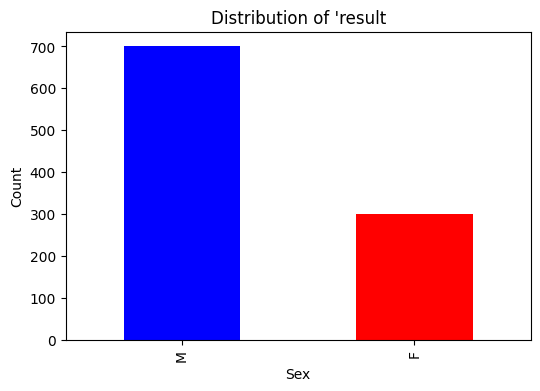

In [ ]:
# Explore Target Variable
plt.figure(figsize=(6, 4))
df['Sex'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title("Distribution of 'result")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

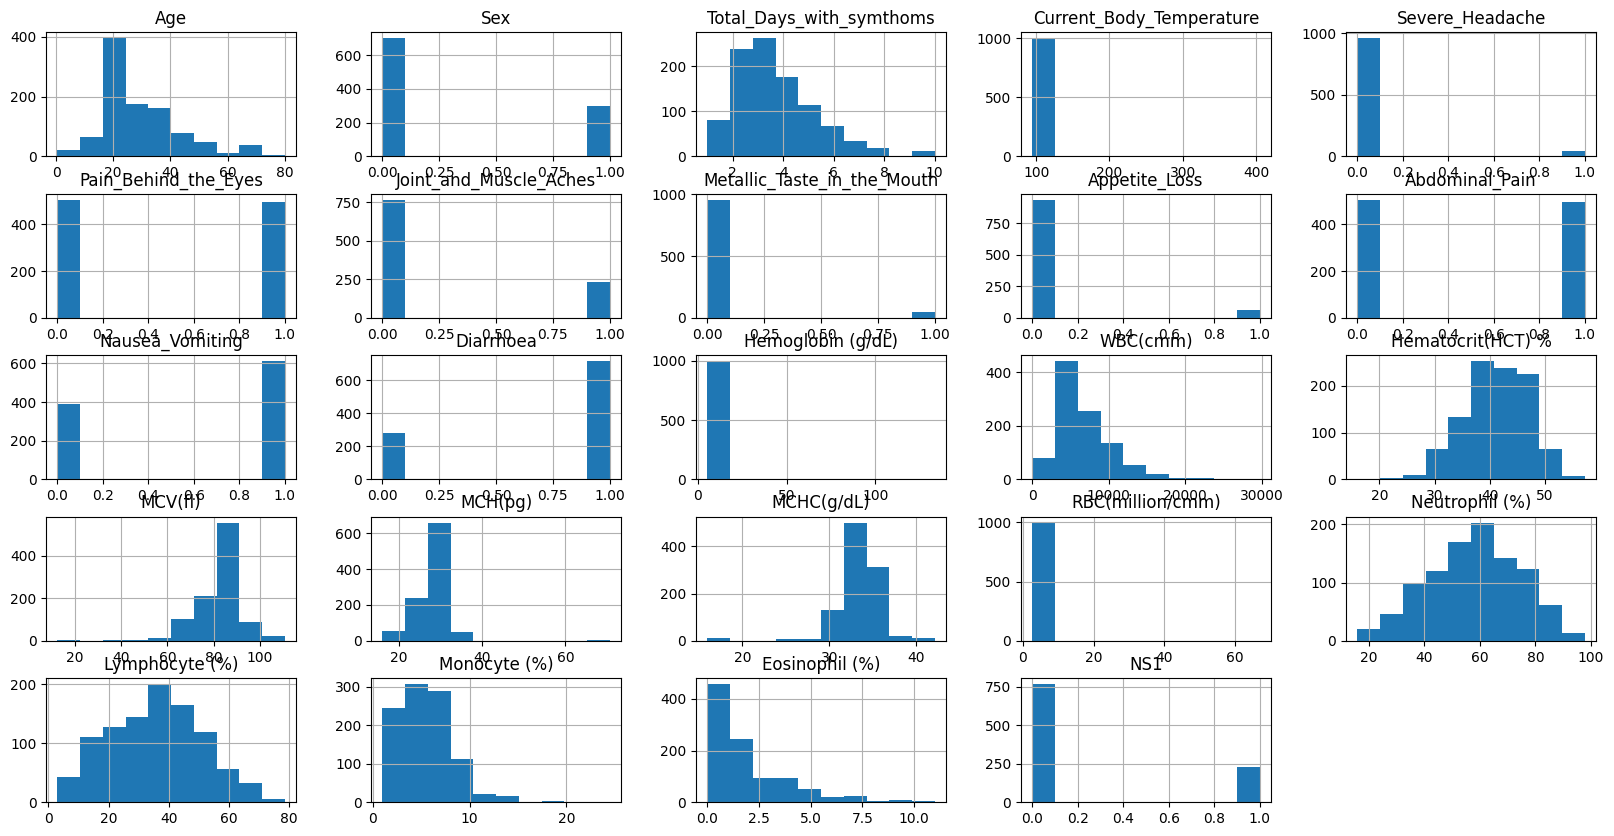

In [ ]:
df1.hist(figsize=(20,10))
plt.show()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

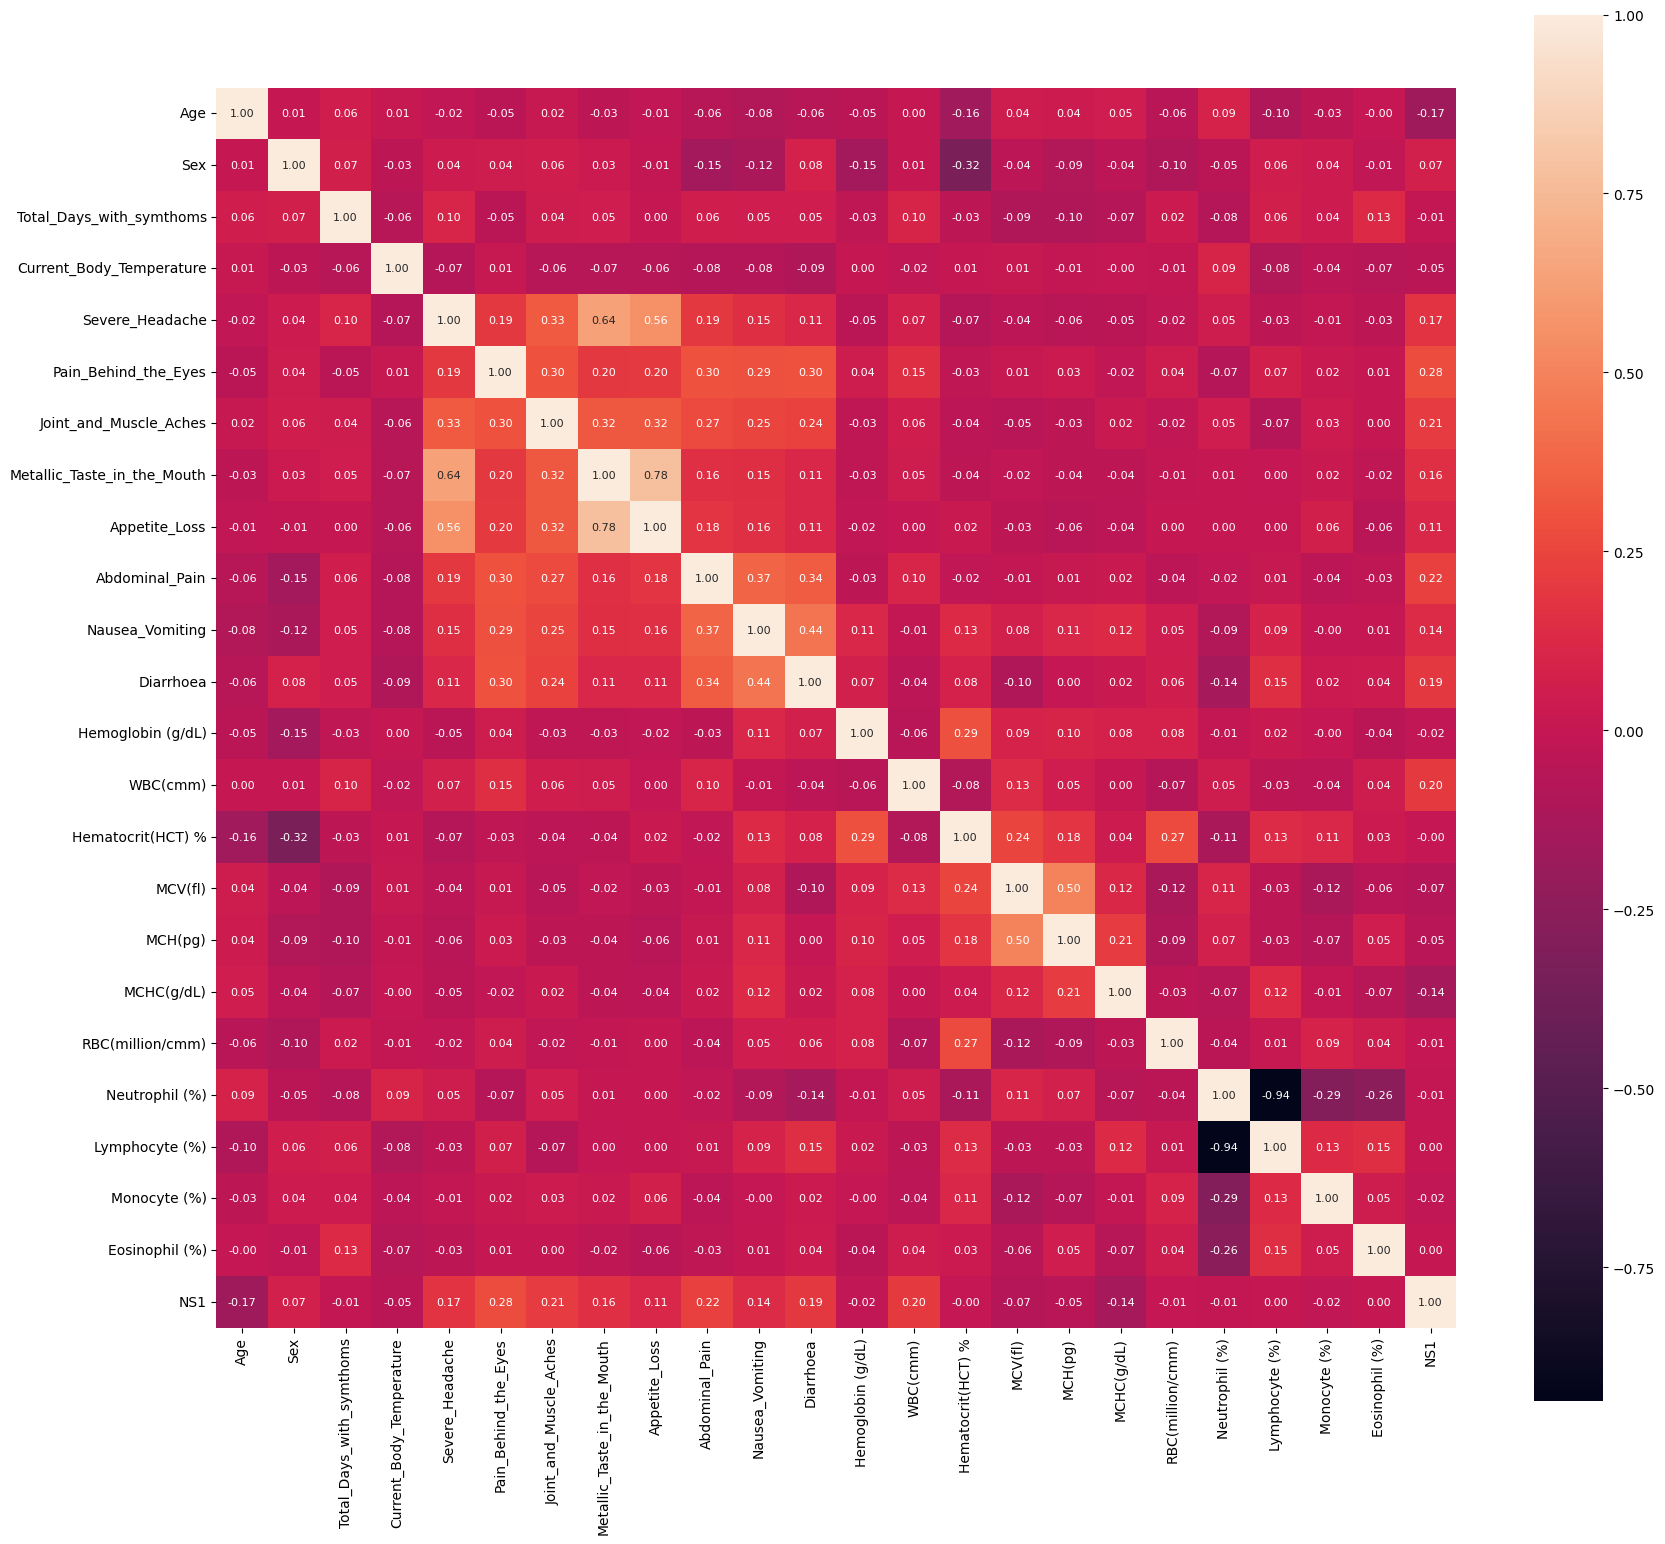

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,18))
sns.heatmap(df1.corr(),cbar='True',square = 'True',annot = True ,annot_kws={'size':8},fmt='.2F')

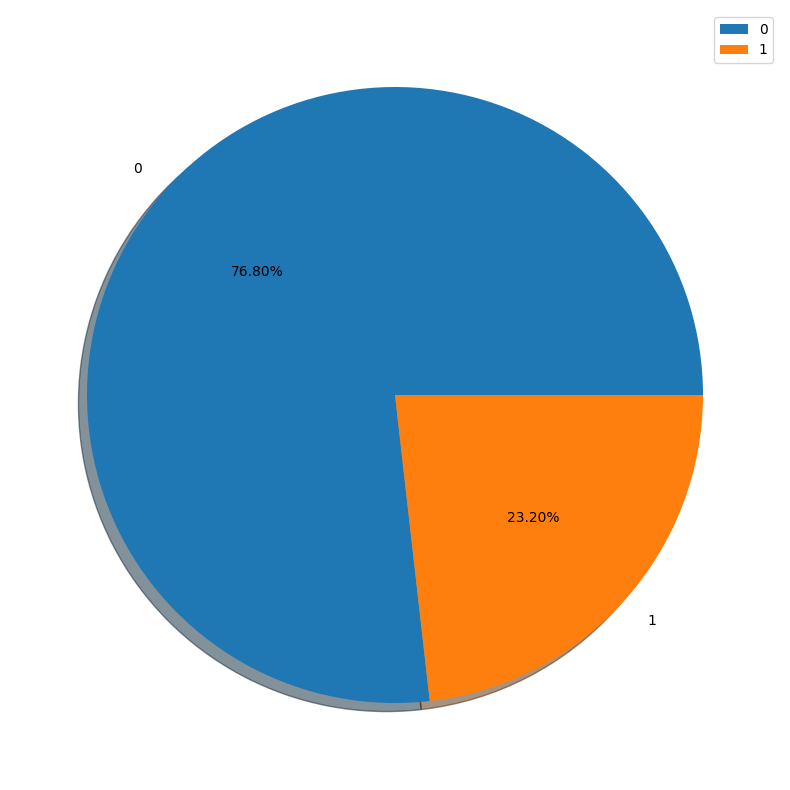

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(df1.NS1.value_counts(),labels=df1.NS1.value_counts().index,autopct="%.2f%%",shadow=True)
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
X = df1.drop(['NS1'],axis=1)
Y = df1['NS1']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split( X, Y, test_size=0.2, random_state=2)

In [ ]:
X

,Age,Sex,Total_Days_with_symthoms,Current_Body_Temperature,Severe_Headache,Pain_Behind_the_Eyes,Joint_and_Muscle_Aches,Metallic_Taste_in_the_Mouth,Appetite_Loss,Abdominal_Pain,...,Hematocrit(HCT) %,MCV(fl),MCH(pg),MCHC(g/dL),RBC(million/cmm),Neutrophil (%),Lymphocyte (%),Monocyte (%),Eosinophil (%),Platelet (cmm)
0,22.0,0,5,102.0,0,0,0,0,0,1,...,44.00,83.00,28.0,33.00,4.77,58.00,32.0,9.0,1.0,150000.0
1,22.0,0,4,101.0,0,1,1,0,0,1,...,44.50,88.50,31.8,36.00,5.03,66.30,28.5,4.9,0.0,266000.0
2,40.0,0,3,102.0,0,0,0,0,0,1,...,39.00,86.90,29.6,34.00,4.49,75.00,18.0,4.0,3.0,233000.0
3,24.0,0,3,101.0,0,1,0,0,0,1,...,38.00,80.30,27.8,34.70,4.70,57.00,41.0,1.0,1.0,202000.0
4,22.0,0,4,102.0,0,0,0,0,0,0,...,51.11,81.40,25.1,30.80,6.27,44.00,40.0,11.0,5.0,132000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.5,0,3,103.0,0,0,0,0,0,0,...,48.41,105.06,33.5,32.94,4.50,59.28,35.7,2.0,1.0,202000.0
996,0.5,0,3,103.0,0,0,0,0,0,0,...,43.10,94.90,32.2,33.90,4.54,40.00,45.0,8.0,7.0,213000.0
997,21.0,0,2,102.0,0,1,0,0,0,0,...,40.00,77.30,27.9,16.20,5.19,85.00,11.0,3.0,1.0,118000.0
998,39.0,1,4,102.0,0,0,0,0,0,0,...,44.00,79.10,28.2,35.70,5.60,70.00,20.0,9.0,1.0,186000.0


In [ ]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: NS1, Length: 1000, dtype: int64

In [ ]:
X.shape

(1000, 24)

In [ ]:
# Option 1: Remove rows with NaN values
# xtrain = xtrain.fillna(xtrain.mean())

In [ ]:
print(len(xtrain),len(ytrain),len(ytest),len(ytrain))

800 800 200 800


################################LogisticRegression############################

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(xtrain, ytrain)

LogisticRegression()

 accuracy on training data

In [ ]:
X_train_prediction = model.predict(xtrain)
training_data_accuracy = accuracy_score(ytrain, X_train_prediction)

In [ ]:
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.84875


# accuracy on test data

In [ ]:
X_test_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score(ytest, X_test_prediction)

In [ ]:
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.79


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'NS1' is a binary classification target
# If it's multiclass, you might need to adjust the code accordingly

# Accuracy
training_data_accuracy = accuracy_score(ytrain, X_train_prediction)
test_data_accuracy = accuracy_score(ytest, X_test_prediction)

# Confusion Matrix
conf_matrix_train = confusion_matrix(ytrain, X_train_prediction)
conf_matrix_test = confusion_matrix(ytest, X_test_prediction)

# Classification Report
classification_rep_train = classification_report(ytrain, X_train_prediction)
classification_rep_test = classification_report(ytest, X_test_prediction)

print(f"Training Data Accuracy: {training_data_accuracy}")
print(f"Test Data Accuracy: {test_data_accuracy}")

print("\nConfusion Matrix (Training Data):")
print(conf_matrix_train)

print("\nConfusion Matrix (Test Data):")
print(conf_matrix_test)

print("\nClassification Report (Training Data):")
print(classification_rep_train)

print("\nClassification Report (Test Data):")
print(classification_rep_test)


Training Data Accuracy: 0.84875
Test Data Accuracy: 0.79

Confusion Matrix (Training Data):
[[614   7]
 [114  65]]

Confusion Matrix (Test Data):
[[146   1]
 [ 41  12]]

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       621
           1       0.90      0.36      0.52       179

    accuracy                           0.85       800
   macro avg       0.87      0.68      0.71       800
weighted avg       0.86      0.85      0.82       800


Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       147
           1       0.92      0.23      0.36        53

    accuracy                           0.79       200
   macro avg       0.85      0.61      0.62       200
weighted avg       0.82      0.79      0.74       200



<Axes: >

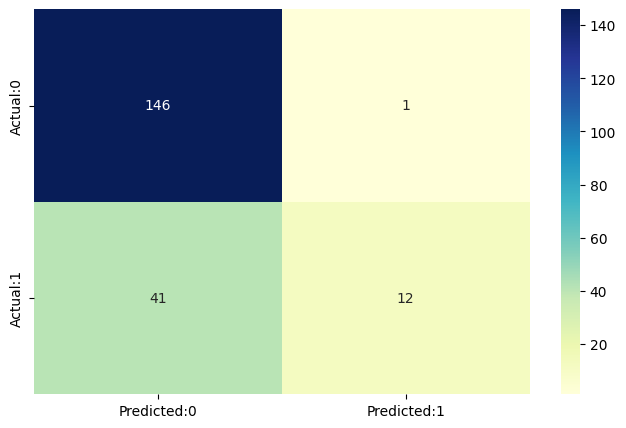

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest, X_test_prediction)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
# Calculate overall accuracy
overall_accuracy = accuracy_score(Y, model.predict(X))
print(f"Overall Accuracy: {overall_accuracy}")

Overall Accuracy: 0.837


#########################RandomForestClassifier##########################

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming df1 is your DataFrame containing the dataset
X = df1.drop(['NS1'], axis=1)
Y = df1['NS1']

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=2)

# Create a Random Forest Classifier model
model = RandomForestClassifier(random_state=2)

# Train the model
model.fit(xtrain, ytrain)

# Predictions on the training set
X_train_prediction = model.predict(xtrain)
training_data_accuracy = accuracy_score(ytrain, X_train_prediction)

# Predictions on the testing set
X_test_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score(ytest, X_test_prediction)

# Calculate overall accuracy
overall_accuracy = accuracy_score(Y, model.predict(X))

# Print the accuracies
print(f"Training Data Accuracy: {training_data_accuracy}")
print(f"Test Data Accuracy: {test_data_accuracy}")
print(f"Overall Accuracy: {overall_accuracy}")


Training Data Accuracy: 1.0
Test Data Accuracy: 0.965
Overall Accuracy: 0.993


In [ ]:
##################SVM#################

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming df1 is your DataFrame containing the dataset
X = df1.drop(['NS1'], axis=1)
Y = df1['NS1']

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=2)

# Create an SVM model
model = SVC(random_state=2)

# Train the model
model.fit(xtrain, ytrain)

# Predictions on the training set
X_train_prediction = model.predict(xtrain)
training_data_accuracy = accuracy_score(ytrain, X_train_prediction)

# Predictions on the testing set
X_test_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score(ytest, X_test_prediction)

# Calculate overall accuracy
overall_accuracy = accuracy_score(Y, model.predict(X))

# Print the accuracies
print(f"Training Data Accuracy: {training_data_accuracy}")
print(f"Test Data Accuracy: {test_data_accuracy}")
print(f"Overall Accuracy: {overall_accuracy}")


Training Data Accuracy: 0.8575
Test Data Accuracy: 0.805
Overall Accuracy: 0.847


In [ ]:
import pickle

In [ ]:
filename = 'dengu_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('dengu_model.sav', 'rb'))

In [ ]:

prediction=loaded_model.predict([[22.0,0,5, 102.0,0,0, 0, 0, 0, 1,0,1,13.2,6220,44,83,28,33,4.77,58,32,9, 1,150000]])
print(prediction)

[0]


X does not have valid feature names, but SVC was fitted with feature names
